In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score 
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
#import churn dataset
churn_data = pd.read_csv("C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D209/Assessment 1/churn_clean.csv")

churn_data.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#check for duplicate values
print(churn_data.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [4]:
#check for missing values
churn_data.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [5]:
#change the "None" value in column InternetService to "Not Provided" because we need that data without it appearing as null
churn_data['InternetService'] = churn_data['InternetService'].fillna('Not Provided')

In [6]:
#verify change worked correctly
churn_data['InternetService'].head(10)

0     Fiber Optic
1     Fiber Optic
2             DSL
3             DSL
4     Fiber Optic
5    Not Provided
6             DSL
7             DSL
8             DSL
9     Fiber Optic
Name: InternetService, dtype: object

In [7]:
#verify that there are no longer "null" values in the InternetService column
churn_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [8]:
#Rename the survey columns to be used later
churn_data.rename(columns = {'Item1': 'Timely_Response',
                             'Item2': 'Timely_Fixes',
                             'Item3': 'Timely_Replacements',
                             'Item4': 'Reliability',
                             'Item5': 'Options',
                             'Item6': 'Respectful_Response',
                             'Item7': 'Courteous_Exchange',
                             'Item8': 'Active_Listening'},
                  inplace = True)                             

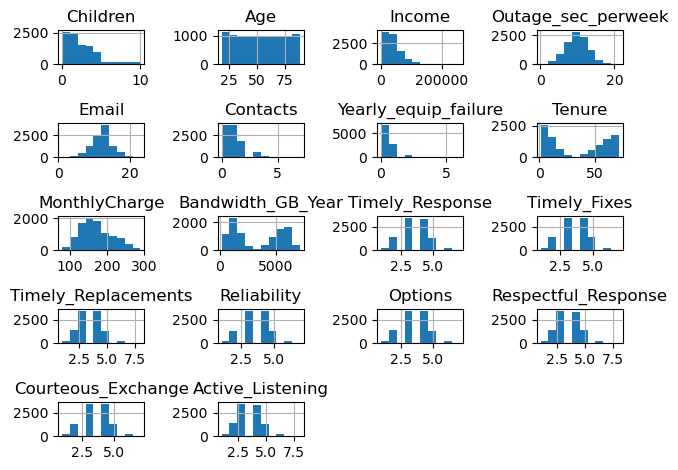

In [9]:
#Create histograms of numeric variables to check for outliers
churn_data[['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year',
            'Timely_Response','Timely_Fixes','Timely_Replacements','Reliability','Options','Respectful_Response','Courteous_Exchange','Active_Listening']].hist()
plt.tight_layout()

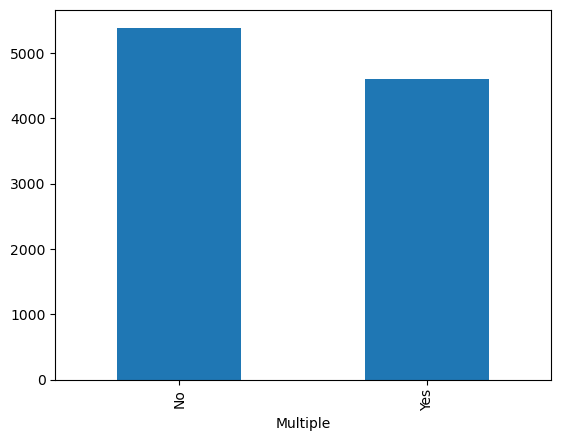

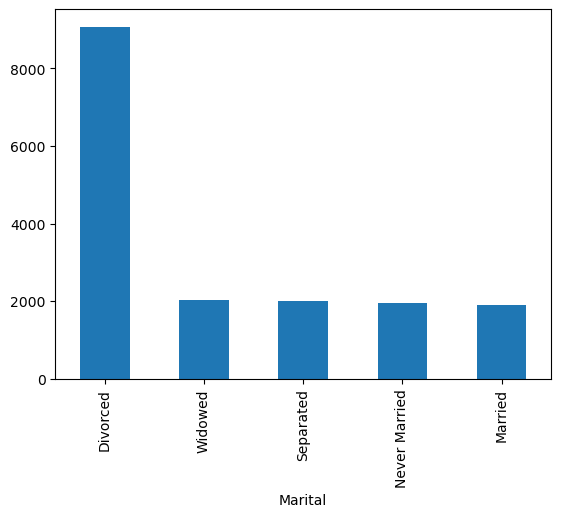

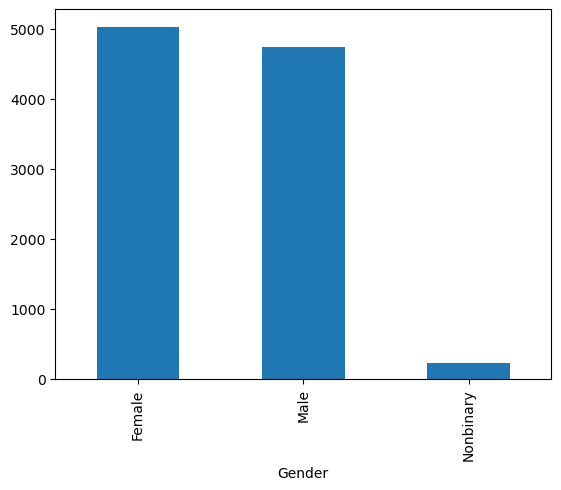

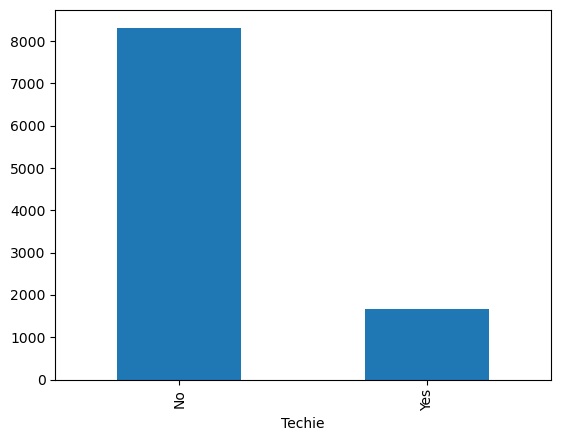

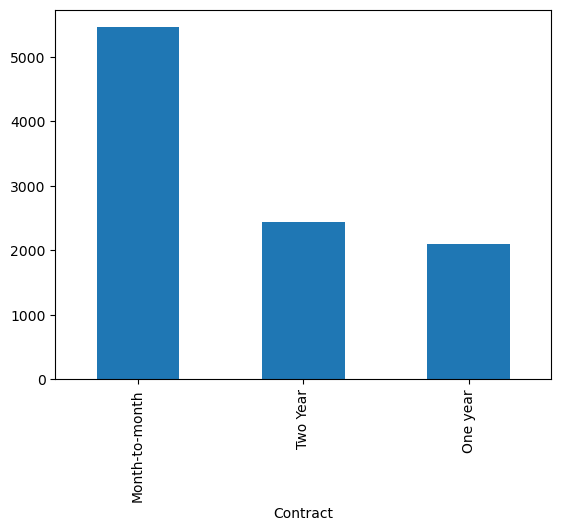

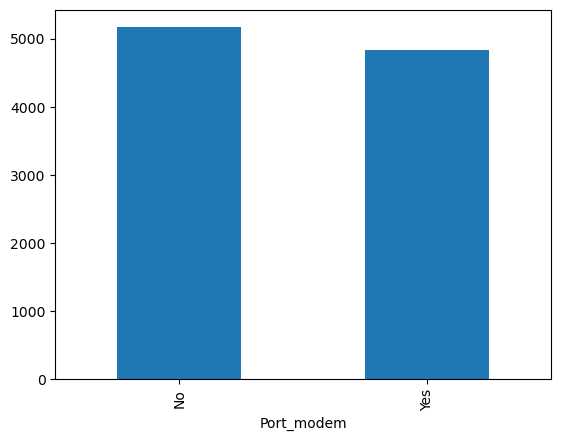

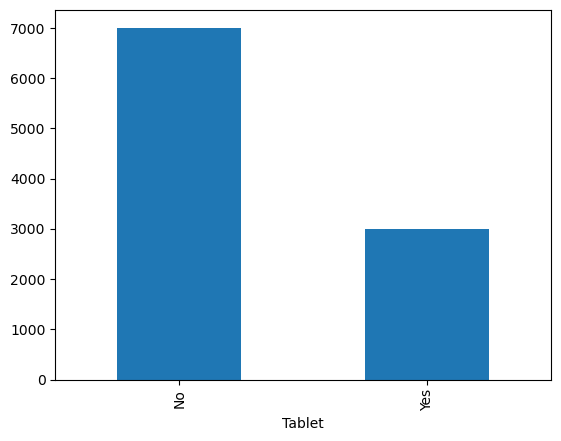

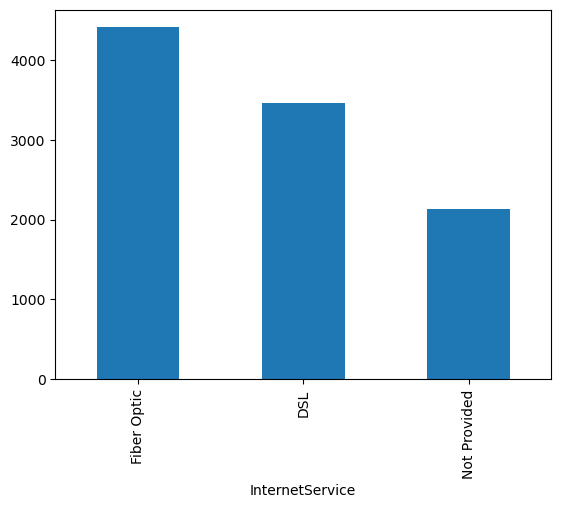

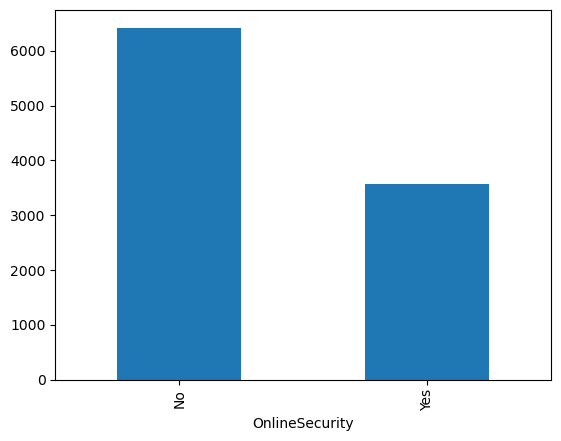

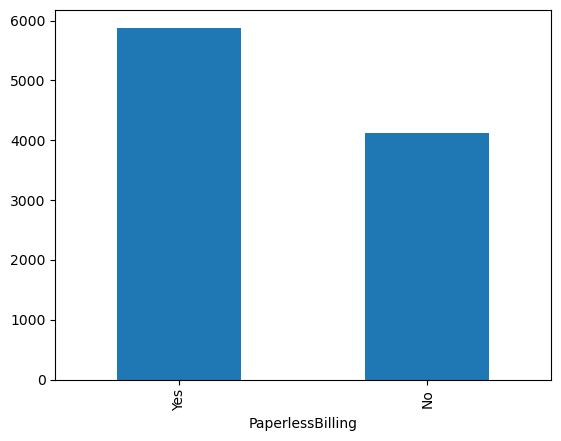

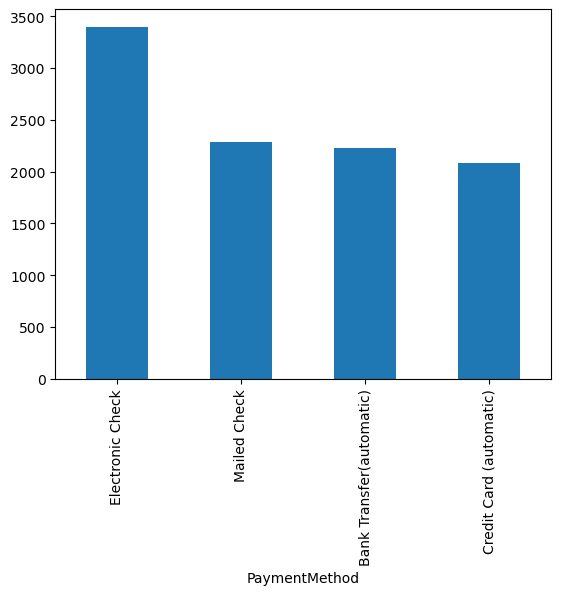

<Figure size 640x480 with 0 Axes>

In [10]:
#Create bar graphs to check for outliers in the categorical variables
churn_data['Phone'].value_counts().plot(kind='bar')
plt.figure(0)

churn_data['Multiple'].value_counts().plot(kind='bar')
plt.figure(1)

churn_data['Marital'].value_counts().plot(kind='bar')
plt.figure(2)

churn_data['Gender'].value_counts().plot(kind='bar')
plt.figure(3)

churn_data['Techie'].value_counts().plot(kind='bar')
plt.figure(4)

churn_data['Contract'].value_counts().plot(kind='bar')
plt.figure(5)

churn_data['Port_modem'].value_counts().plot(kind='bar')
plt.figure(6)

churn_data['Tablet'].value_counts().plot(kind='bar')
plt.figure(7)

churn_data['InternetService'].value_counts().plot(kind='bar')
plt.figure(8)

churn_data['OnlineSecurity'].value_counts().plot(kind='bar')
plt.figure(9)

churn_data['PaperlessBilling'].value_counts().plot(kind='bar')
plt.figure(10)

churn_data['PaymentMethod'].value_counts().plot(kind='bar')
plt.figure(11)

plt.tight_layout()

In [11]:
#Wrangle the data
#Encode Categorical data as numerical
#Binary variables encoded with 1 for Yes and 0 For No

churn_data['Techie'] = churn_data['Techie'].map(
    {'Yes':1, 'No':0})
churn_data['Techie'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: Techie, dtype: int64

In [12]:
churn_data['Port_modem'] = churn_data['Port_modem'].map(
    {'Yes':1, 'No':0})
churn_data['Port_modem'].head(10)

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    1
Name: Port_modem, dtype: int64

In [13]:
churn_data['Tablet'] = churn_data['Tablet'].map(
    {'Yes':1, 'No':0})
churn_data['Tablet'].head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Tablet, dtype: int64

In [14]:
churn_data['Phone'] = churn_data['Phone'].map(
    {'Yes':1, 'No':0})
churn_data['Phone'].head(10)

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    0
8    1
9    1
Name: Phone, dtype: int64

In [15]:
churn_data['Multiple'] = churn_data['Multiple'].map(
    {'Yes':1, 'No':0})
churn_data['Multiple'].head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Multiple, dtype: int64

In [16]:
churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].map(
    {'Yes':1, 'No':0})
churn_data['OnlineSecurity'].head(10)

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    1
9    1
Name: OnlineSecurity, dtype: int64

In [17]:
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].map(
    {'Yes':1, 'No':0})
churn_data['PaperlessBilling'].head(10)

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    1
9    1
Name: PaperlessBilling, dtype: int64

In [18]:
churn_data['Churn'] = churn_data['Churn'].map(
    {'Yes':1, 'No':0})
churn_data['Churn'].head(10)

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    1
8    0
9    0
Name: Churn, dtype: int64

In [19]:
#Complete data wrangling process by re-expressing non binary categorical variables as numeric using get_dummies()

churn_data = pd.get_dummies(churn_data, dtype=int, drop_first=True, columns = ['Marital','Gender','Contract','InternetService','PaymentMethod'])
churn_data.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,1,1,0,1,0,1,0,1,0,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,0,0,0,0,0,1,0,0,0,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,1,0,0,0,1,0,0,1,0,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,0,1,0,0,1,0,0,0,0,1
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,0,1,0,0,0,1,0,0,0,1
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,0,0,0,1,0,0,1,0,1,0
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,1,1,0,0,0,0,0,0,1,0
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,0,0,0,0,0,0,0,0,0,1
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,0,0,1,0,0,0,0,0,0,0
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,0,0,0,0,1,1,0,0,0,1


In [20]:
#Remove all columns from the dataset that will not be used in the knn analysis
churn_data.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat',
                 'Lng','Population','Area','TimeZone','Job','OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies'], axis=1, inplace=True)

In [21]:
#Standardize the numerical variables for analysis
churn_data['Children']=stats.zscore(churn_data['Children'])

churn_data['Age']=stats.zscore(churn_data['Age'])

churn_data['Income']=stats.zscore(churn_data['Income'])

churn_data['Outage_sec_perweek']=stats.zscore(churn_data['Outage_sec_perweek'])

churn_data['Email']=stats.zscore(churn_data['Email'])

churn_data['Contacts']=stats.zscore(churn_data['Contacts'])

churn_data['Yearly_equip_failure']=stats.zscore(churn_data['Yearly_equip_failure'])

churn_data['Tenure']=stats.zscore(churn_data['Tenure'])

churn_data['MonthlyCharge']=stats.zscore(churn_data['MonthlyCharge'])

churn_data['Bandwidth_GB_Year']=stats.zscore(churn_data['Bandwidth_GB_Year'])

churn_data['Timely_Response']=stats.zscore(churn_data['Timely_Response'])

churn_data['Timely_Fixes']=stats.zscore(churn_data['Timely_Fixes'])

churn_data['Timely_Replacements']=stats.zscore(churn_data['Timely_Replacements'])

churn_data['Reliability']=stats.zscore(churn_data['Reliability'])

churn_data['Options']=stats.zscore(churn_data['Options'])

churn_data['Respectful_Response']=stats.zscore(churn_data['Respectful_Response'])

churn_data['Courteous_Exchange']=stats.zscore(churn_data['Courteous_Exchange'])

churn_data['Active_Listening']=stats.zscore(churn_data['Active_Listening'])

churn_data.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,-0.972338,0.720925,-0.398778,0,-0.679978,-0.666282,-1.005852,0.946658,0,1,...,1,1,0,1,0,1,0,1,0,0
1,-0.506592,-1.259957,-0.641954,1,0.570331,-0.005288,-1.005852,0.946658,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.890646,-0.148730,-1.070885,0,0.252347,-0.996779,-1.005852,0.946658,1,1,...,1,0,0,0,1,0,0,1,0,0
3,-0.506592,-0.245359,-0.740525,0,1.650506,0.986203,1.017588,-0.625864,1,0,...,0,1,0,0,1,0,0,0,0,1
4,-0.972338,1.445638,0.009478,1,-0.623156,1.316700,1.017588,0.946658,0,1,...,0,1,0,0,0,1,0,0,0,1


In [22]:
#Save the cleaned and wrangled data to a CSV file
churn_data.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D209/Assessment 1/processed_data.csv')

In [23]:
#Define X as independent variables and y as dependent variable
X = churn_data.drop(['Churn'], axis=1)

y = churn_data['Churn']

X.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,...,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,0,1,1,...,1,1,0,1,0,1,0,1,0,0
1,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,1,1,0,...,1,0,0,0,1,0,0,1,0,0
3,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [24]:
#Split into training and test data and fit knn model with trainingg data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
#Save training and test data to csv files
X_train.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D209/Assessment 1/X_Training_data.csv')

X_test.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D209/Assessment 1/X_Test_data.csv')

y_train.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D209/Assessment 1/y_Training_data.csv')

y_test.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D209/Assessment 1/y_Test_data.csv')

In [26]:
#Make training and testing data arrays so that they can be used in the knn model
X_train = X_train.values

y_train = y_train.values

X_test = X_test.values

y_test = y_test.values

In [27]:
#Fit the normalized model
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
#Create prediction comparing training data to test data
pred = knn.predict(X_test)

In [29]:
#Get accuracy score from initial model
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
AUC = roc_auc_score(y_test, pred)


print("Initial Accuracy Score:", accuracy)
print("Initial Precision Score:", precision)
print("Initial Recall Score:", recall)
print("Initial ROC-AUC Score:", AUC)

Initial Accuracy Score: 0.811
Initial Precision Score: 0.6804347826086956
Initial Recall Score: 0.5753676470588235
Initial ROC-AUC Score: 0.7372030542986424


<Axes: >

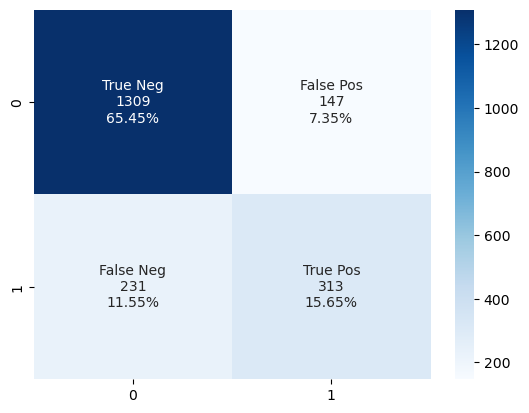

In [30]:
#Create confusion matrix
'''(Dennis T, 2019)''' '''See reference table in report for URL'''

cm = confusion_matrix(y_test, pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [31]:
#Perfom cross validation to get the best value for k
''' (Shafi, 2023)''' '''See Reference Table in report to find URL'''

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y.ravel(), cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

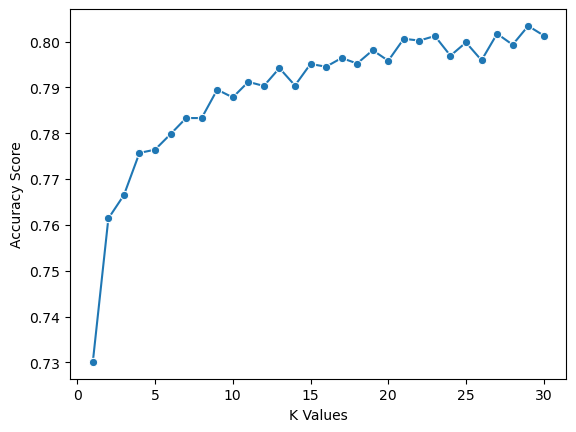

In [32]:
#Plot the values found above to visualize the best k value
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [33]:
#Train the model using the best k value found above
#Find the highest value from the scores
best_index = np.argmax(scores)
best_k = k_values[best_index]

#Fit the updated knn model with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=29)

In [34]:
#Create prediction comparing training data to test data for optimized model
y_pred = knn.predict(X_test)

In [35]:
#Evaluate the model using the accuracy score, precision score, and recall score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Optimized Accuracy Score:", accuracy)
print("Optimized Precision Score:", precision)
print("Optimized Recall Score:", recall)

Optimized Accuracy Score: 0.84
Optimized Precision Score: 0.8043478260869565
Optimized Recall Score: 0.5441176470588235


<Axes: >

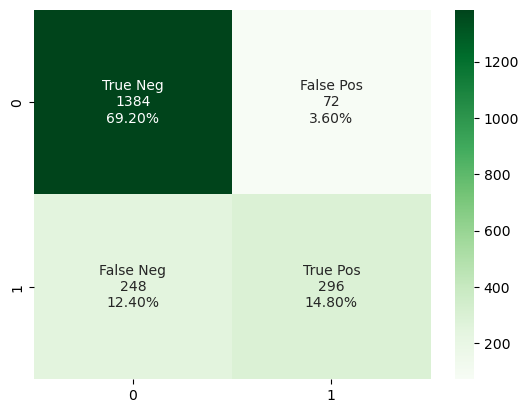

In [36]:
#Create confusion matrix for optimized model to help us better understand AUC ROC

cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

In [37]:
#compute the roc-auc score for the model

auc_score = roc_auc_score(y_test, y_pred)
print("Optimized AUC Score:", auc_score)

Optimized AUC Score: 0.7473335488041368
